<center><b><h1> &nbsp; &nbsp; ECEN - Data Mining and Analysis Project
 </h1><b></center>
<center><b><h1>   &nbsp; &nbsp; Fashion MNIST </h1><b></center>


### Steps to run this notebook

Step 1: Install all the required libraries

Step 2: Import all the required libraries

Step 3: Load data using Data Loading and Preparation Block

Step 4: Run Data Cleaning Block

Step 5: Check the class distribution and statistical summary using Exploratory Data Analysis Block

Step 6: Run Data Visualization Block to check different visualization of data (TSNE Visualization will take time to run)

Step 7: Split data into train, test and validation sets

Step 8: Transform the data by normalizing it

Step 9: Run the Dimensionality Reduction block to perform PCA

Step 10: Run Model selection block to check the validation performance of different models and compare their scores

Step 11: Skip model hyperparameter tuning as it will take 2 hours to run

Step 12: Run CNN model with best parameters that we got from hyperparameter tuning

Step 13: Run Model interpretablity block to check how model is predicting the output

###### Skip running Hyperparameter tuning block


### 1. Install all the required libraries

In [ ]:
# install all the required libraries
!pip install pandas
!pip install numpy
!pip install tensorflow
!pip install scikit-learn
!pip install Pillow
!pip install matplotlib
!pip install seaborn
!pip install keras

### 2. Import all the required libraries

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk
from PIL import Image as im
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist
from sklearn import preprocessing
from sklearn.manifold import TSNE
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import keras
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm
import itertools as it
from tensorflow.keras.callbacks import EarlyStopping
import pickle

import warnings
warnings.filterwarnings("ignore")

### 3. Data Loading and Preparation

In [ ]:
# import data from keras datasets
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [ ]:
# Flatten the 2D array
flat_trainX = trainX.reshape(trainX.shape[0], -1)

# Combine trainX and trainy
combined_data = np.column_stack((flat_trainX, trainy))

# Convert to DataFrame
column_names = [f"pixel_{i}" for i in range(flat_trainX.shape[1])] + ["label"]
train_data = pd.DataFrame(combined_data, columns=column_names)

In [ ]:
# Flatten the 2D array
flat_testX = testX.reshape(testX.shape[0], -1)

# Combine trainX and trainy
combined_data = np.column_stack((flat_testX, testy))

# Convert to DataFrame
column_names = [f"pixel_{i}" for i in range(flat_testX.shape[1])] + ["label"]
test_data = pd.DataFrame(combined_data, columns=column_names)

In [ ]:
# check size of data
print("Shape of Train data: ", train_data.shape)
print("Shape of Test data: ", test_data.shape)

Shape of Train data:  (60000, 785)
Shape of Test data:  (10000, 785)


> We have converted the data into dataframe for the ease of analysis

### 4. Data Cleaning

In [ ]:
# to check valid pixel range
features = train_data.drop(['label'],axis=1).values
sum(sum(features>255)!=0)

0

In [ ]:
# check for null values in training dataset
sum(train_data.isnull().sum())

0

In [ ]:
# check for null values in test dataset
sum(test_data.isnull().sum())

0

In [ ]:
# check for dulicated values in training dataset
train_data.duplicated().sum()

0

> The data doesn't have any null values as well as duplicate values

### 5. Exploratory Data Analysis

>### Descriptive statistics

> #### Class Distribution

In [ ]:
# Class Distributions on training set:
class_distribution_train = train_data['label'].value_counts()

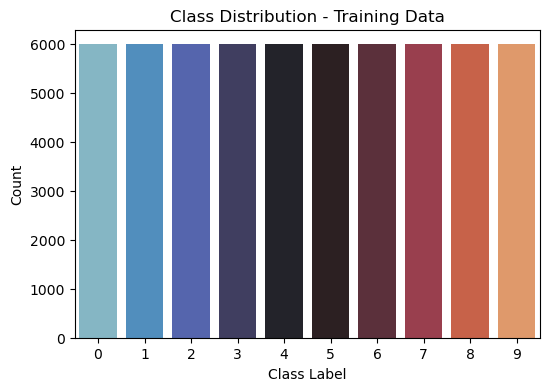

In [ ]:
# plot class distribution on training set
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution_train.index, y=class_distribution_train.values,palette='icefire')
plt.title('Class Distribution - Training Data')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# Class Distributions on testing set:
class_distribution_test = test_data['label'].value_counts()


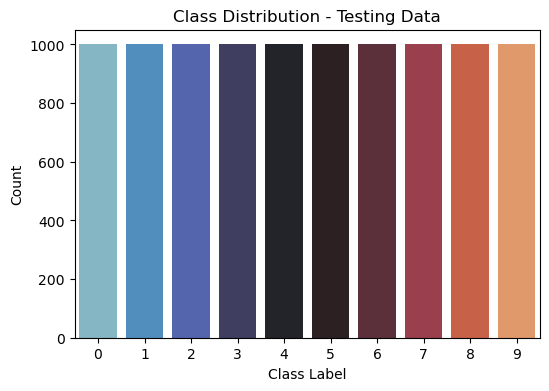

In [ ]:
# plot class distribution on test set
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution_test.index, y=class_distribution_test.values,palette='icefire')
plt.title('Class Distribution - Testing Data')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

> #### Data Statistics

In [ ]:
# statistical summary
pixel_stats = train_data.iloc[:, 1:].describe()
pixel_stats

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,32.955950,...,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883,4.500000
std,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,57.762681,...,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829,2.872305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000,9.000000


### 6. Data Visualization

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

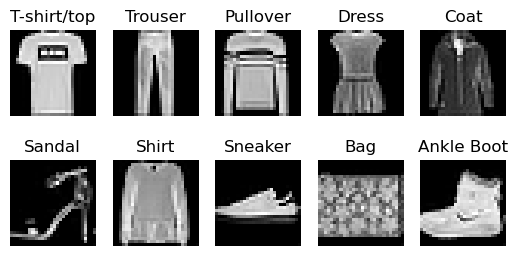

In [ ]:
# visualization all the 10 classes
unique_labels = np.unique(train_data['label'])
for i, label in enumerate(unique_labels):
    sample_image = train_data[train_data['label'] == label].iloc[0, 1:].values.reshape(28, 28)
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f'{labels[i]}')
    plt.axis('off')

plt.show()

> ### TSNE

>t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line.

In [ ]:
## this can take some time to run
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(train_data.iloc[:, 1:])

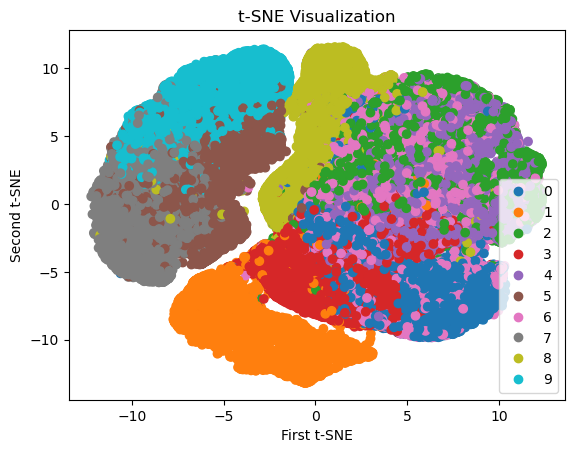

In [ ]:
tsne_result.shape
plot = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=train_data['label'], cmap='tab10')
plt.title('t-SNE Visualization')
plt.legend(handles=plot.legend_elements()[0], labels=list(labels))
plt.xlabel('First t-SNE')
plt.ylabel('Second t-SNE')
plt.show()

### 7. Data Split into train, validation and test

In [ ]:
# separate features and target variables
train_Y = train_data["label"].values
train_X = train_data.drop(labels = ["label"], axis = 1)

In [ ]:
# separate features and target variables
test_Y = test_data["label"].values
test_X = test_data.drop(labels = ["label"], axis = 1)

In [ ]:
# Split the train and the validation set for the fitting
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size = 0.1, random_state = 2)

### 8. Data Transformation

In [ ]:
# Normalizing the data
train_X = train_X / 255.0
test_X = test_X / 255.0
val_X = val_X / 255.0

print("Training Data", train_X.shape)
print("Validation Data", val_X.shape)
print("Test Data", test_X.shape)

Training Data (54000, 784)
Validation Data (6000, 784)
Test Data (10000, 784)


### 9. Dimensionality Reduction



In [ ]:
# PCA function
def pca_data(data,info_pres):
    cov_matrix = np.cov(data, rowvar=False)

    # Computing the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sorting eigenvalues in descending order
    eigenvalue_index = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_index]
    eigenvectors = eigenvectors[:, eigenvalue_index]

    explained_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

    n_components = np.argmax(explained_variance >= info_pres) + 1

    pca = PCA(n_components=n_components)
    pca.fit(data)
    return pca

In [ ]:
# Preserving 90% of information

# fitting pca on train set
pca=pca_data(train_X,0.90)

In [ ]:
# transforming data using trained PCA
train_pca = pca.transform(train_X)
print("Train shape",train_pca.shape)

val_pca = pca.transform(val_X)
print("Validation shape",val_pca.shape)

test_pca = pca.transform(test_X)
print("Test shape",test_pca.shape)

Train shape (54000, 84)
Validation shape (6000, 84)
Test shape (10000, 84)


In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

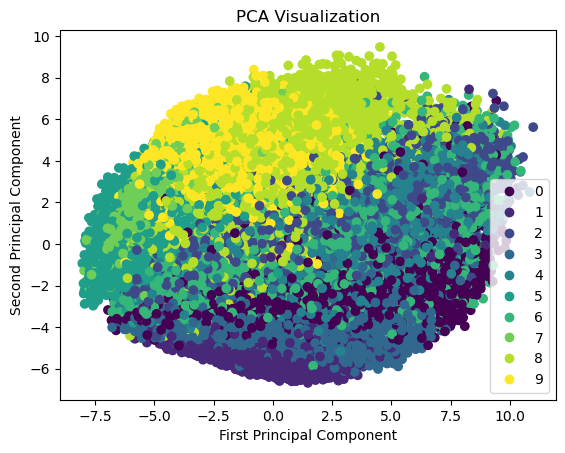

In [ ]:
plot = plt.scatter(train_pca[:,0], train_pca[:,1], c=train_Y)
plt.legend(handles=plot.legend_elements()[0], labels=list(labels))
plt.title('PCA Visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### 10. Model Selection


> In the journey of model selection, we embarked on training various algorithms like Random Forest, CNN, Decision Tree, and K Neighbors. As we navigated through, the Convolutional Neural Network (CNN) emerged as the standout performer in accuracy. Our focus shifted towards refining this CNN model through meticulous hyperparameter tuning, recognizing its potential to yield the most promising results among all models explored.

In [ ]:
columns = ['model_name', 'precision', 'recall', 'f1_score', 'accuracy']
model_comparison = pd.DataFrame(columns=columns)

> #### Training model for Random Forest Classifer

In [ ]:
# implementation of random forest classfier
clf = RandomForestClassifier()
clf.fit(train_pca, train_Y)
val_predictions = clf.predict(val_pca)

In [ ]:
accuracy_rfc = accuracy_score(val_Y, val_predictions)
precision_rfc = precision_score(val_Y, val_predictions, pos_label='positive', average='micro')
recall_rfc = recall_score(val_Y, val_predictions, pos_label='positive', average='micro')
f1_score_rfc = f1_score(val_Y, val_predictions, pos_label='positive', average='micro')

model_comparison = model_comparison.append({'model_name': 'Random Forest Classfier'}, ignore_index=True)
model_comparison.loc[model_comparison['model_name'] == 'Random Forest Classfier', 'precision'] = precision_rfc
model_comparison.loc[model_comparison['model_name'] == 'Random Forest Classfier', 'recall'] = recall_rfc
model_comparison.loc[model_comparison['model_name'] == 'Random Forest Classfier', 'f1_score'] = f1_score_rfc
model_comparison.loc[model_comparison['model_name'] == 'Random Forest Classfier', 'accuracy'] = accuracy_rfc

In [ ]:
conf_matrix_rfc = confusion_matrix(val_Y, val_predictions)
print("Confusion Matrix of Random Forest Classifier")
print(conf_matrix_rfc)

Confusion Matrix of Random Forest Classifier
[[512   1   7  16   3   1  55   0  11   0]
 [  1 578   2  17   1   0   3   0   0   0]
 [  4   0 488   7  74   0  34   0   6   0]
 [ 19   1   6 552  23   0  12   0   4   1]
 [  1   1  56  24 494   0  33   0   4   0]
 [  0   0   0   0   0 555   0  21   2   8]
 [ 90   1  68  16  56   0 348   0   8   0]
 [  0   0   0   0   0  18   0 599   1  22]
 [  0   0   2   3   1   4   9   1 546   1]
 [  0   0   0   0   0  11   0  21   1 535]]


> #### Training model for Random Forest Classifer

In [ ]:
# implementation of k-nearest neighbor classfier
clf = KNeighborsClassifier()
clf.fit(train_pca, train_Y)
val_predictions = clf.predict(val_pca)

In [ ]:
accuracy_knn = accuracy_score(val_Y, val_predictions)
precision_knn = precision_score(val_Y, val_predictions, average='weighted')
recall_knn = recall_score(val_Y, val_predictions, average='weighted')
f1_score_knn = f1_score(val_Y, val_predictions, average='weighted')

model_comparison = model_comparison.append({'model_name': 'k-Nearest Neighbor Classifier'}, ignore_index=True)
model_comparison.loc[model_comparison['model_name'] == 'k-Nearest Neighbor Classifier', 'precision'] = precision_knn
model_comparison.loc[model_comparison['model_name'] == 'k-Nearest Neighbor Classifier', 'recall'] = recall_knn
model_comparison.loc[model_comparison['model_name'] == 'k-Nearest Neighbor Classifier', 'f1_score'] = f1_score_knn
model_comparison.loc[model_comparison['model_name'] == 'k-Nearest Neighbor Classifier', 'accuracy'] = accuracy_knn

In [ ]:
conf_matrix_knn = confusion_matrix(val_Y, val_predictions)
print("Confusion Matrix of k-Nearest Neighbor Classifier")
print(conf_matrix_knn)

Confusion Matrix of k-Nearest Neighbor Classifier
[[516   1   6  10   1   0  66   1   5   0]
 [  0 585   1  13   0   0   3   0   0   0]
 [ 10   0 477   6  71   0  48   0   1   0]
 [ 26   1   6 545  25   0  14   0   1   0]
 [  3   1  61  15 484   0  47   0   2   0]
 [  0   0   0   0   0 536   0  32   0  18]
 [ 91   1  66  13  53   0 358   0   5   0]
 [  0   0   0   0   0   5   0 619   0  16]
 [  5   1   6   2   0   0   6   4 543   0]
 [  0   0   0   0   0   4   0  11   0 553]]


In [ ]:
print(f"Accuracy on the Validation data (Random Forest): {accuracy_rfc * 100:.2f}%")
print(f"Accuracy on the Validation data (KNeighborsClassifier): {accuracy_knn * 100:.2f}%")

Accuracy on the Validation data (Random Forest): 86.78%
Accuracy on the Validation data (KNeighborsClassifier): 86.93%


>#### Training Model for Convulation Neural Network

In [ ]:
# reshaping the feature set
train_X_cnn = train_X.values.reshape(-1,28,28,1)
test_X_cnn = test_X.values.reshape(-1,28,28,1)
val_X_cnn = val_X.values.reshape(-1,28,28,1)


print('Training Data Shape :', train_X_cnn.shape)
print('Validation Data Shape :', val_X_cnn.shape)
print('Testing Data Shape :', test_X_cnn.shape)

Training Data Shape : (54000, 28, 28, 1)
Validation Data Shape : (6000, 28, 28, 1)
Testing Data Shape : (10000, 28, 28, 1)


In [ ]:
# defining all the layers of CNN
def model_cnn(filters_layer1, filters_layer2, filters_layer3, kernel_size):
  # Model
    model = Sequential()
  # Adding convolution 2D
    model.add(Conv2D(filters_layer1, kernel_size=kernel_size,
                  activation='relu',
                  kernel_initializer='he_normal',
                  input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters_layer2,
                  kernel_size=kernel_size,
                  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters_layer3, kernel_size, activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))


    model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                optimizer='adam',
                metrics=['accuracy'])
    return model

In [ ]:
# calling defined function for CNN
model = model_cnn(32, 64, 128, (3,3))

In [ ]:
# setting epochs and batch size
epochs = 5
batch_size = 128

In [ ]:
# training cnn model on train dataset
train_model = model.fit(train_X_cnn, train_Y,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(val_X_cnn, val_Y))

Epoch 1/5
  1/422 [..............................] - ETA: 1:08 - loss: 2.3171 - accuracy: 0.0938

2023-11-22 22:12:40.820025: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


422/422 [==============================] - 9s 20ms/step - loss: 0.5161 - accuracy: 0.8117 - val_loss: 0.3626 - val_accuracy: 0.8735
Epoch 2/5
422/422 [==============================] - 9s 21ms/step - loss: 0.3266 - accuracy: 0.8802 - val_loss: 0.3000 - val_accuracy: 0.8930
Epoch 3/5
422/422 [==============================] - 9s 21ms/step - loss: 0.2762 - accuracy: 0.8991 - val_loss: 0.2860 - val_accuracy: 0.8995
Epoch 4/5
422/422 [==============================] - 9s 21ms/step - loss: 0.2440 - accuracy: 0.9099 - val_loss: 0.2740 - val_accuracy: 0.8985
Epoch 5/5
422/422 [==============================] - 9s 21ms/step - loss: 0.2217 - accuracy: 0.9182 - val_loss: 0.2816 - val_accuracy: 0.8988


In [ ]:
model.evaluate(val_X_cnn,val_Y)

188/188 [==============================] - 1s 3ms/step - loss: 0.2816 - accuracy: 0.8988


[0.28155195713043213, 0.8988333344459534]

In [ ]:
val_predictions = model.predict(val_X_cnn)

188/188 [==============================] - 1s 3ms/step


In [ ]:
val_predictions = tf.argmax(val_predictions, axis=1)

# Convert predicted_labels to numpy array
val_predictions = val_predictions.numpy()

In [ ]:
accuracy_cnn = accuracy_score(val_Y, val_predictions)
precision_cnn = precision_score(val_Y, val_predictions, average='weighted')
recall_cnn = recall_score(val_Y, val_predictions, average='weighted')
f1_score_cnn = f1_score(val_Y, val_predictions, average='weighted')

model_comparison = model_comparison.append({'model_name': 'CNN Classifier'}, ignore_index=True)
model_comparison.loc[model_comparison['model_name'] == 'CNN Classifier', 'precision'] = precision_cnn
model_comparison.loc[model_comparison['model_name'] == 'CNN Classifier', 'recall'] = recall_cnn
model_comparison.loc[model_comparison['model_name'] == 'CNN Classifier', 'f1_score'] = f1_score_cnn
model_comparison.loc[model_comparison['model_name'] == 'CNN Classifier', 'accuracy'] = accuracy_cnn

In [ ]:
conf_matrix_cnn = confusion_matrix(val_Y, val_predictions)
print("Confusion Matrix of CNN Classifier")
print(conf_matrix_cnn)

Confusion Matrix of CNN Classifier
[[548   1  25   4   2   1  21   0   4   0]
 [  0 590   0  10   1   0   1   0   0   0]
 [  6   0 566   6  20   0  12   0   3   0]
 [ 21   0   4 564  19   1   9   0   0   0]
 [  0   1  96  15 482   0  17   0   2   0]
 [  0   0   0   0   0 569   0  14   0   3]
 [ 95   0  80  16  49   0 343   0   4   0]
 [  0   0   0   0   0   2   0 630   1   7]
 [  4   0   1   2   1   0   3   1 555   0]
 [  0   0   0   0   0   1   0  20   1 546]]


In [ ]:
print(f"Accuracy on the Validation data (CNN): {accuracy_cnn * 100:.2f}%")

Accuracy on the Validation data (CNN): 89.88%


### Model Comparison

In [ ]:
print(model_comparison)

                      model_name precision    recall  f1_score  accuracy
0        Random Forest Classfier  0.867833  0.867833  0.867833  0.867833
1  k-Nearest Neighbor Classifier  0.869669  0.869333   0.86905  0.869333
2                 CNN Classifier   0.90246  0.898833  0.896808  0.898833


> The CNN model achieved a good accuracy (comapred to KNeighborsClassifierand Random Forest) on the validation dataset using default parameters. Hence, we are now proceeding with the tasks of fine-tuning, evaluating, and interpreting the model to enhance its performance and understand its outcomes more comprehensively.







### 11. Hyperparameter Tuning of CNN

Due to the extensive time required for the tuning process, the code has been commented out. At the end of this section, a table is provided containing the best parameters obtained after the tuning process.







In [ ]:
# # providing list of parameters for hyperparameter tuning
# param_grid ={
#     "filters_layer1" : [16, 32, 64],
#     "filters_layer2" : [32,64,128],
#     "filters_layer3" : [64,128,256],
#     "kernel_size" : [(2,2),(3,3)]
# }

# allNames = sorted(param_grid)
# combinations = it.product(*(param_grid[Name] for Name in allNames))
# comb = list(combinations)

In [ ]:
# results = []
# best_accuracy = 0

In [ ]:
# # The execution of the following code segment may take around 2 to 3 hours to complete.

# for c in tqdm(comb):
#     filters_layer1 = c[0]
#     filters_layer2 = c[1]
#     filters_layer3 = c[2]
#     kernel_size= c[3]
#     model= model_cnn(filters_layer1,filters_layer2,filters_layer3,kernel_size)

#     train_model = model.fit(train_X_cnn, train_Y,
#                   batch_size=batch_size,
#                   epochs=epochs,
#                   verbose=0,
#                   validation_data=(val_X_cnn, val_Y))

#     score = model.evaluate(val_X_cnn, val_Y, verbose=0)

#     dic = {
#       "filters_layer1" : filters_layer1,
#       "filters_layer2" : filters_layer2,
#       "filters_layer3" : filters_layer3,
#       "kernel_size" : kernel_size,
#       "accuracy" : score[1]
#   }

#     results.append(dic)

#     if score[1]>best_accuracy:
#         best_filters_layer1 = filters_layer1
#         best_filters_layer2 = filters_layer2
#         best_filters_layer3 = filters_layer3
#         best_kernel_size = kernel_size
#         best_accuracy = score[1]

100%|███████████████████████████████████████████| 54/54 [50:28<00:00, 56.08s/it]


In [ ]:
# print("Best filters layer 1: ", best_filters_layer1)
# print("Best filters layer 2: ",best_filters_layer2)
# print("Best_filters_layer 3: ",best_filters_layer3 )
# print("Best_kernel_size: ",best_kernel_size )
# print("Best_accuracy: ", best_accuracy)

Best filters layer 1:  64
Best filters layer 2:  64
Best_filters_layer 3:  256
Best_kernel_size:  (2, 2)
Best_accuracy:  0.9198333621025085


In [ ]:
# with open("results.pkl", "wb") as pickle_file:
#     pickle.dump(results, pickle_file)

# # # The output has been stored in the file named results.pkl

In [ ]:
# with open("results.pkl", 'rb') as file:
#     data = pickle.load(file)

In [ ]:
# # Retrieving the best parameters stored in the file named results.pkl
# best_acc=0
# for dic in data:
#     if dic["accuracy"]> best_acc:
#         best_acc = dic["accuracy"]

#         best_filters_layer1 = dic["filters_layer1"]
#         best_filters_layer2 = dic["filters_layer2"]
#         best_filters_layer3 = dic["filters_layer3"]
#         best_kernel_size = dic["kernel_size"]

In [ ]:
# print("best filters layer 1: ",best_filters_layer1)
# print("best filters layer 2: ",best_filters_layer2)
# print("best filters layer 3: ",best_filters_layer3)
# print("best kernel size: ",best_kernel_size)

best filters layer 1:  64
best filters layer 2:  64
best filters layer 3:  256
best kernel size:  (2, 2)


Following the tuning process, the parameters resulting in the best performance are as follows:

|  Parameter    | Value |
|----------|-----|
| best filters layer 1    | 64  |
| best filters layer 2   | 128 |
| best filters layer 3  | 256 |
| best kernel size  | (3,3) |

### 12. Model Evaluation with Tuned Parameters

In [ ]:
# Building CNN model with best parameters
model = model_cnn(64, 128, 256, (3,3))
epochs = 1 #10
batch_size = 128

According to the instructions, the epoch size has been set to 1.

Our model is achieving its highest accuracy at the 10th epoch. This table provides an overview of the accuracy observations across epochs.



|  Epoch Size    | Validation Accuracy | Test Accuracy |
|----------|-----|--------|
| 5     |  89.88 |  90.06  |
| 10    | 91.25 | 91.03  |


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_model = model.fit(train_X_cnn, train_Y,
                  batch_size=batch_size,
                  epochs=epochs,
                  callbacks=[early_stopping],
                  verbose=1,
                  validation_data=(val_X_cnn, val_Y))

# evaluation on validation data
model.evaluate(val_X_cnn,val_Y)

Epoch 1/10
422/422 [==============================] - 28s 66ms/step - loss: 0.4703 - accuracy: 0.8268 - val_loss: 0.3482 - val_accuracy: 0.8715
Epoch 2/10
422/422 [==============================] - 27s 63ms/step - loss: 0.3087 - accuracy: 0.8866 - val_loss: 0.3088 - val_accuracy: 0.8873
Epoch 3/10
422/422 [==============================] - 28s 65ms/step - loss: 0.2610 - accuracy: 0.9040 - val_loss: 0.2763 - val_accuracy: 0.9030
Epoch 4/10
422/422 [==============================] - 27s 64ms/step - loss: 0.2251 - accuracy: 0.9159 - val_loss: 0.2551 - val_accuracy: 0.9100
Epoch 5/10
422/422 [==============================] - 28s 67ms/step - loss: 0.1952 - accuracy: 0.9277 - val_loss: 0.2448 - val_accuracy: 0.9125
Epoch 6/10
422/422 [==============================] - 28s 66ms/step - loss: 0.1708 - accuracy: 0.9362 - val_loss: 0.2708 - val_accuracy: 0.9040
Epoch 7/10
422/422 [==============================] - 27s 64ms/step - loss: 0.1494 - accuracy: 0.9442 - val_loss: 0.2538 - val_accuracy:

[0.24482232332229614, 0.9125000238418579]

In [ ]:
#loaded_model = model_cnn(64, 128, 256, (3,3))

In [ ]:
#loaded_model.load_weights("weights.h5")

In [ ]:
#loaded_model.evaluate(val_X_cnn,val_Y)

In [ ]:
score = model.evaluate(test_X_cnn, test_Y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.2503 - accuracy: 0.9103
Test loss: 0.25031834840774536
Test accuracy: 0.9103000164031982


In [ ]:
#get the predictions for the test data
test_predicted_classes = model.predict(test_X_cnn)
# Checking how correctly the model is predicting
p = np.argmax(test_predicted_classes[:10000],axis=1)
y = test_Y
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

313/313 [==============================] - 2s 8ms/step
Correct predicted classes: 9103
Incorrect predicted classes: 897


In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(10)]
predicted_classes=np.argmax(test_predicted_classes, axis=1)
print(classification_report(test_Y, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.84      0.89      0.86      1000
    Class 1 (Trouser) :       0.99      0.98      0.99      1000
   Class 2 (Pullover) :       0.88      0.84      0.86      1000
      Class 3 (Dress) :       0.88      0.95      0.91      1000
       Class 4 (Coat) :       0.83      0.88      0.86      1000
     Class 5 (Sandal) :       0.98      0.98      0.98      1000
      Class 6 (Shirt) :       0.80      0.67      0.73      1000
    Class 7 (Sneaker) :       0.95      0.97      0.96      1000
        Class 8 (Bag) :       0.98      0.99      0.98      1000
 Class 9 (Ankle Boot) :       0.98      0.95      0.97      1000

               accuracy                           0.91     10000
              macro avg       0.91      0.91      0.91     10000
           weighted avg       0.91      0.91      0.91     10000



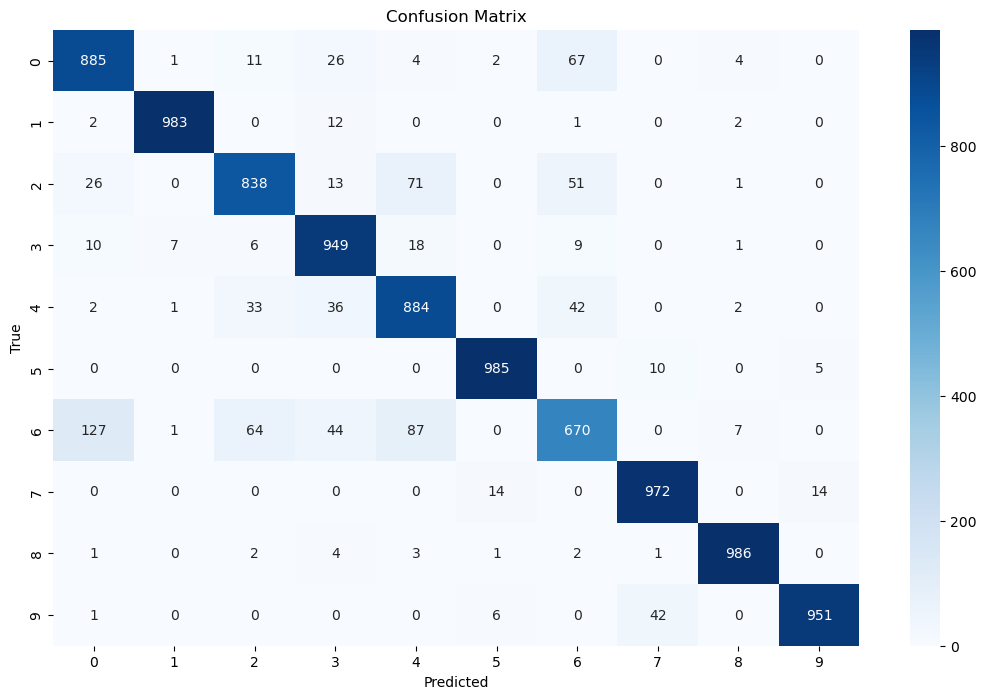

In [ ]:
# Confusion matrix
cm = confusion_matrix(test_Y, p)

plt.figure(figsize=(13, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 13. Model interpretablity

>The higher the interpretability of an ML model, the easier it is to comprehend the model's predictions.

In [ ]:
# defining function to generate interpretablity
def generate_grad_cam(model, last_conv_layer_name, image, class_index):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(image)
        class_output = predictions[:, class_index]

    grads = tape.gradient(class_output, conv_output)
    pooled_grads = tf.reduce_mean(tf.nn.relu(grads), axis=(0, 1, 2))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_output), axis=-1)

    heatmap /= np.max(heatmap)

    return heatmap

In [ ]:
model.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_165 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 13, 13, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_166 (Conv2D)         (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_111 (MaxPooli  (None, 5, 5, 128)        0         
 ng2D)                                                           
                                                                 
 conv2d_167 (Conv2D)         (None, 3, 3, 256)         295168    
                                                                 
 flatten_55 (Flatten)        (None, 2304)            

In [ ]:
best_layer = model.layers[0]

In [ ]:
print(f"\nInformation about the second layer:\n{best_layer.get_config()}")
best_layer_config = best_layer.get_config()


Information about the second layer:
{'name': 'conv2d_165', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 28, 28, 1), 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


In [ ]:
best_layer_name = best_layer_config['name']

1/1 [==============================] - 0s 8ms/step


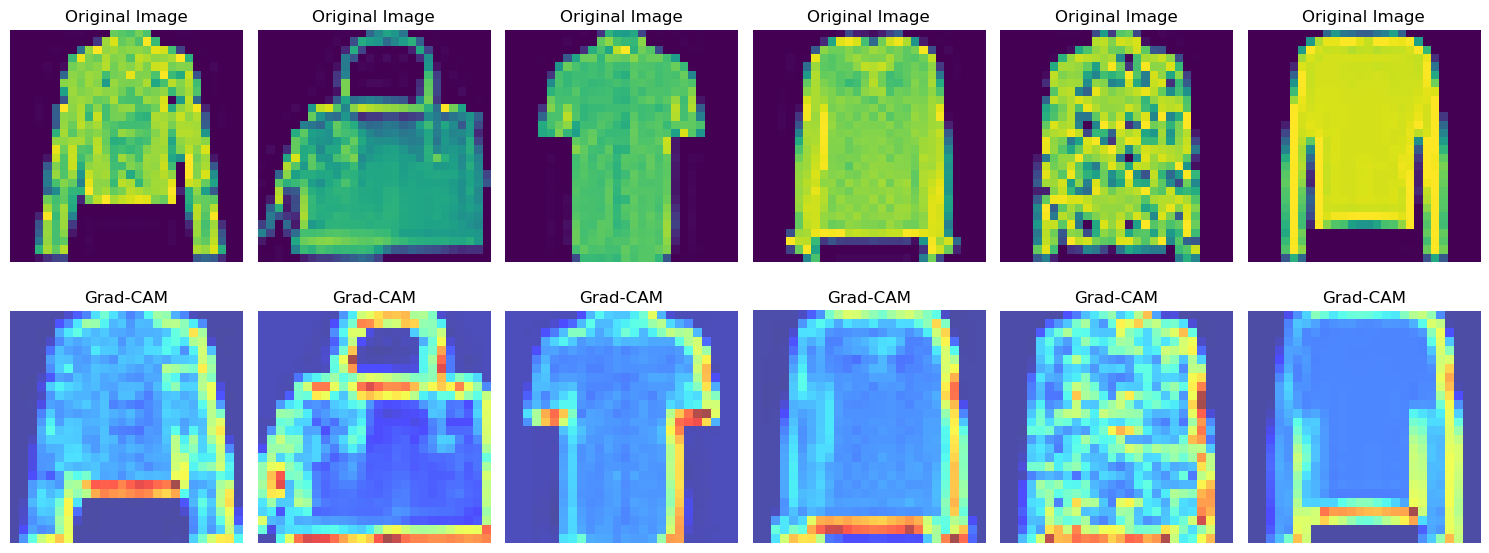

In [ ]:
images =  val_X_cnn[40:46]
fig, axs = plt.subplots(2, 6, figsize=(15, 6))
last_conv_layer = best_layer_name

for i in range(6):
    axs[0, i].imshow(images[i])
    axs[0, i].set_title("Original Image")
    axs[0, i].axis('off')

    axs[1, i].imshow(generate_grad_cam(model, last_conv_layer, images[i].reshape(1,28,28,1), np.argmax(model.predict(images[i].reshape(1,28,28,1)))), cmap='jet', alpha=0.7)
    axs[1, i].set_title("Grad-CAM")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

> In the provided image above, the Grad-CAM heatmap illustrates the regions contributing significantly to the model's classification decision. These visualizations are instrumental in explaining the CNN's behavior, providing valuable insights into its inner workings.

### Business Insights
The results and insights gained from this project hold valuable implications for a clothing company seeking to implement image classification for various purposes. Here are several practical implications for such a business:

#### 1. *Enhanced Product Categorization:*
   - The CNN model, identified as the most effective in this project, can be employed by a clothing company to automatically categorize and organize their diverse product offerings.
   - Efficient image classification can streamline inventory management and facilitate a more organized and user-friendly online shopping experience.

#### 2. *Improved Recommendation Systems:*
   - Leveraging the image classification capabilities, the company can enhance its recommendation systems, providing customers with more accurate and personalized product suggestions based on their preferences.
   - A well-trained model can understand style patterns, color preferences, and other features, contributing to a more targeted and appealing recommendation system.

#### 3. *Automated Tagging and Cataloging:*
   - The CNN model can be integrated into the company's workflow for automated tagging and cataloging of new products.
   - This automation not only saves time and resources but also ensures consistency in product labeling and classification across the entire inventory.

#### 4. *Efficient Image Search and Retrieval:*
   - The image classification system can be integrated into the company's website or app, enabling customers to efficiently search and retrieve products through image-based queries.
   - This enhances the user experience by providing a visually intuitive search method.

#### 5. *Data-Driven Marketing Strategies:*
   - Insights from the image classification model can inform data-driven marketing strategies.
   - Understanding which clothing styles or categories are more popular among customers can guide targeted advertising efforts and promotional campaigns.

#### 6. *Adaptation to Trend Changes:*
   - The model's ability to recognize and classify different clothing styles can assist the company in staying abreast of changing fashion trends.
   - This information can inform decisions related to inventory management, production planning, and marketing campaigns.

#### 7. *Customer Engagement and Satisfaction:*
   - Improved accuracy in product categorization and recommendation systems can lead to increased customer satisfaction.
   - The ability to provide customers with relevant and appealing product suggestions enhances engagement and promotes a positive shopping experience.

##### It's important for the clothing company to recognize the practical value of implementing advanced image classification techniques not only for operational efficiency but also for creating a more personalized and enjoyable experience for their customers. Regular updates, monitoring, and further refinement of the image classification model can contribute to sustained improvements and adaptation to evolving market trends.